# Tellurium, Antimony and libRoadRunner Introduction
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-and-libroadrunner.png" width="60%" style="padding: 20px"></div>
<div align='center' style='font-size:100%'>
Veronica L. Porubsky, BS
<div align='center' style='font-size:100%'>Sauro Lab PhD Student, Department of Bioengineering<br>
Head of Outreach, <a href="https://reproduciblebiomodels.org/dissemination-and-training/seminar/">Center for Reproducible Biomedical Modeling</a><br>
University of Washington, Seattle, WA USA
</div>
<hr>

## TOC
* [Links to relevant resources](#relevant-resources)
* [Packages and constants](#packages-constants)
* [Tellurium, Antimony, and libRoadRunner support rapid simulation and analysis of kinetic models](#rapid-simulation)
* [Writing a simple model in the Antimony language](#write-antimony)
* [Simulating the simple Antimony Model](#simulate-antimony)
* [Plotting the simple Antimony model simulation results](#plot-antimony)
* [Adding events to an Antimony string](#events-antimony)
* [Writing an Antimony model with interactions](#interactions-antimony)
* [SBML description format vs. human-readable Antimony string](#sbml-antimony)
* [Exercises](#exercises)
* [Acknowledgements](#acknowledgements)





# Links to relevant resources <a class="anchor" id="relevant-resources"></a>

<a href="https://github.com/sys-bio/tellurium#installation-instructions">Tellurium installation instructions</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/">Tellurium documentation</a><br>
<a href="https://libroadrunner.readthedocs.io/en/latest/">libRoadRunner documentation</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/antimony.html">Antimony documentation</a><br>
<a href="https://nanohub.org/resources/tellurium">Tellurium environment on nanoHUB</a><br>


# Tellurium, Antimony, and libRoadRunner support rapid simulation and analysis of kinetic models <a class="anchor" id="rapid-simulation"></a>

<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-utilities.png" width="75%" style="padding: 20px"></div>

# Packages and constants <a class="anchor" id="packages-constants"></a>

In [17]:
import tellurium as te # Python-based modeling environment for kinetic models
import roadrunner as rr # High-performance simulation and analysis library
import numpy as np # Scientific computing package
import random # Generate random numbers 
import matplotlib.pylab as plt # Additional Python plotting utilities


# Writing a simple model in the Antimony language <a class="anchor" id="write-antimony"></a>
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/simple-antimony.png" width="75%" style="padding: 20px"></div>

In [18]:
ant_str = """
model test               # name the model
    compartment C1;      # specify compartments
    C1 = 1.0;            # assign compartment volume
    species S1, S2;      # specify species
    S1 in C1; S2 in C1;  # allocate species to appropriate compartment

 
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;
    
    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;

    k1 = 1.0;            # assign constant values to global parameters
end
"""

# Simulating the simple Antimony model <a class="anchor" id="simulate-antimony"></a>

In [19]:
r = te.loada(ant_str)  # create an executable model by loading the string to a RoadRunner object instance
result = r.simulate(0, 10, 25) # simulate(time_start, time_end, number_of_points)
print(result)


        time,        [S1],    [S2]
 [[        0,          10,       0],
  [ 0.416667,      6.5924,  3.4076],
  [ 0.833333,     4.34599, 5.65401],
  [     1.25,     2.86506, 7.13494],
  [  1.66667,     1.88877, 8.11123],
  [  2.08333,     1.24516, 8.75484],
  [      2.5,    0.820861, 9.17914],
  [  2.91667,    0.541147, 9.45885],
  [  3.33333,    0.356747, 9.64325],
  [     3.75,    0.235183, 9.76482],
  [  4.16667,    0.155042, 9.84496],
  [  4.58333,    0.102211, 9.89779],
  [        5,   0.0673815, 9.93262],
  [  5.41667,   0.0444208, 9.95558],
  [  5.83333,   0.0292841, 9.97072],
  [     6.25,   0.0193053, 9.98069],
  [  6.66667,   0.0127269, 9.98727],
  [  7.08333,   0.0083901, 9.99161],
  [      7.5,  0.00553111, 9.99447],
  [  7.91667,  0.00364634, 9.99635],
  [  8.33333,  0.00240382,  9.9976],
  [     8.75,   0.0015847, 9.99842],
  [  9.16667,   0.0010447, 9.99896],
  [  9.58333, 0.000688713, 9.99931],
  [       10, 0.000454029, 9.99955]]



# Plotting the simple Antimony model simulation results <a class="anchor" id="plot-antimony"></a>

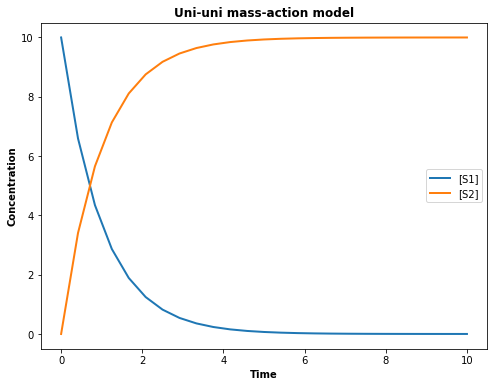

In [20]:
r.plot(title = 'Uni-uni mass-action model', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 


# Adding events to an Antimony string <a class="anchor" id="events-antimony"></a>

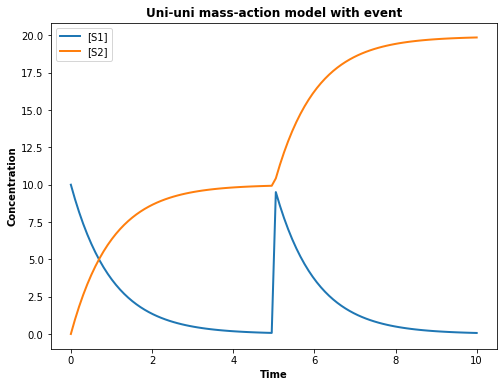

In [21]:
Ant_str = """
model test               # name the model
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;
    
    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;

    k1 = 1.0;            # assign constant values to global parameters
    E1: at (time > 5): S1 = 10; # add an event - spike in S1
end
"""
r = te.loada(Ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model with event', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 



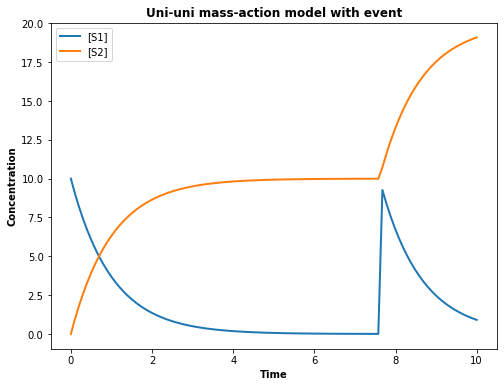

In [22]:
ant_str = """
model test               # name the model
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;
    
    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;

    k1 = 1.0;            # assign constant values to global parameters
    E1: at (S1 < 0.005): S1 = 10; # add an event - spike in S1
end
"""
r = te.loada(ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model with event', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 



# Writing an Antimony model with interactions <a class="anchor" id="interactions-antimony"></a>

<br>
Repressilator circuit from Elowitz & Liebler (2000):
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/repressilator.png" width="40%" style="padding: 20px"></div>

In [23]:
repressilator_str = """
# Compartments and Species:
species M1, P3, P1, M2, P2, M3;

# Reactions:
J0:  -> M1; a_m1*(Kr_P3^n1/(Kr_P3^n1 + P3^n1)) + leak1;
J1: M1 -> ; d_m1*M1;
J2:  -> P1; a_p1*M1;
J3: P1 -> ; d_p1*P1;
J4:  -> M2; a_m2*(Kr_P1^n2/(Kr_P1^n2 + P1^n2)) + leak2;
J5: M2 -> ; d_m2*M2;
J6:  -> P2; a_p2*M2;
J7: P2 -> ; d_p2*P2;
J8:  -> M3; a_m3*(Kr_P2^n3/(Kr_P2^n3 + P2^n3)) + leak3;
J9: M3 -> ; d_m3*M3;
J10:  -> P3; a_p3*M3;
J11: P3 -> ; d_p3*P3;

# Species initializations:
M1 = 0.604016261711246;
P3 = 1.10433330559171;
P1 = 7.94746428021418;
M2 = 2.16464969760648;
P2 = 3.55413750091507;
M3 = 2.20471854765531;

# Variable initializations:
a_m1 = 1.13504504342841;
Kr_P3 = 0.537411795656332;
n1 = 7.75907326833983;
leak1 = 2.59839004225795e-07;
d_m1 = 0.360168301619141;
a_p1 = 5.91755684808254;
d_p1 = 1.11075218613419;
a_m2 = 2.57306185467814;
Kr_P1 = 0.190085253528206;
n2 = 6.89140262856765;
leak2 = 1.51282707494481e-06;
d_m2 = 1.05773721506759;
a_p2 = 8.35628834784826;
d_p2 = 0.520562081730298;
a_m3 = 0.417889543691157;
Kr_P2 = 2.71031378955001;
n3 = 0.44365980532785;
leak3 = 3.63586125130783e-11;
d_m3 = 0.805873530762994;
a_p3 = 4.61276807677109;
d_p3 = 1.54954108126666;

"""

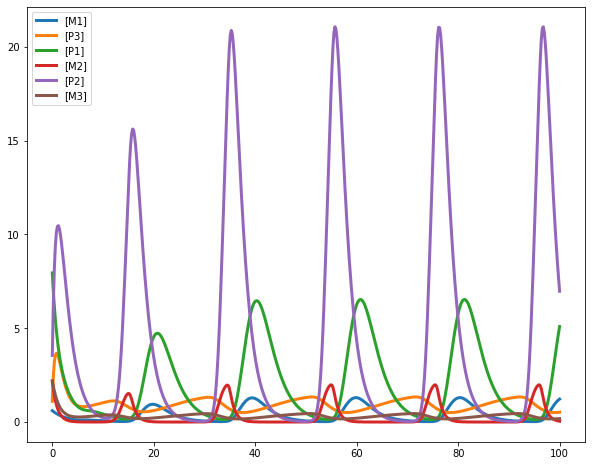

In [24]:
repressilator = te.loada(repressilator_str)
repressilator.simulate(0, 100, 500)
repressilator.plot(figsize = (10, 8), linewidth = 3)


# SBML description format vs. human-readable Antimony string  <a class="anchor" id="sbml-antimony"></a>

In [25]:
print(repressilator.getCurrentSBML())


<?xml version="1.0" encoding="UTF-8"?>
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model metaid="__main" id="__main">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="M1" compartment="default_compartment" initialAmount="1.22326489647735" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="P3" compartment="default_compartment" initialAmount="0.523696242501554" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="P1" compartment="default_compartment" initialAmount="5.09251992143787" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="M2" compartment="default_compartment" initialAmount="0.0419666930196019" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="

In [26]:
print(repressilator.getAntimony())


// Created by libAntimony v2.12.0
// Compartments and Species:
species M1, P3, P1, M2, P2, M3;

// Reactions:
J0:  -> M1; a_m1*(Kr_P3^n1/(Kr_P3^n1 + P3^n1)) + leak1;
J1: M1 -> ; d_m1*M1;
J2:  -> P1; a_p1*M1;
J3: P1 -> ; d_p1*P1;
J4:  -> M2; a_m2*(Kr_P1^n2/(Kr_P1^n2 + P1^n2)) + leak2;
J5: M2 -> ; d_m2*M2;
J6:  -> P2; a_p2*M2;
J7: P2 -> ; d_p2*P2;
J8:  -> M3; a_m3*(Kr_P2^n3/(Kr_P2^n3 + P2^n3)) + leak3;
J9: M3 -> ; d_m3*M3;
J10:  -> P3; a_p3*M3;
J11: P3 -> ; d_p3*P3;

// Species initializations:
M1 = 0.604016261711246;
P3 = 1.10433330559171;
P1 = 7.94746428021418;
M2 = 2.16464969760648;
P2 = 3.55413750091507;
M3 = 2.20471854765531;

// Variable initializations:
a_m1 = 1.13504504342841;
Kr_P3 = 0.537411795656332;
n1 = 7.75907326833983;
leak1 = 2.59839004225795e-07;
d_m1 = 0.360168301619141;
a_p1 = 5.91755684808254;
d_p1 = 1.11075218613419;
a_m2 = 2.57306185467814;
Kr_P1 = 0.190085253528206;
n2 = 6.89140262856765;
leak2 = 1.51282707494481e-06;
d_m2 = 1.05773721506759;
a_p2 = 8.3562883478482

# Exercises

## Exercise 1

JWS Online is a web-based tool that allows users to interact with a graphical interface to construct and simulate models. It also has many stored models and simulations.

Investigate the epidermal growth factor model from <a href="https://jjj.mib.ac.uk/models/kholodenko1/">Kholodenko 1999 on JWS Online</a>. Click on "simulation" to visualize the model and simulation capabilities.Explore the simulations and alter parameter values to see the effect on the model output.

More information about this model can be found on the <a href="https://www.ebi.ac.uk/biomodels/BIOMD0000000048">BioModels Database</a>. What biological domain was this model designed to study?

Interested in another biological process? Filter the results of the <a href="https://jjj.mib.ac.uk/models/?&process=1&jwsmodel__model_type=&organism=&id=&page=2">JWS Online Model Database</a> to find and explore a relevant model!




## Exercise 2:

Write an Antimony model for the network you previously wrote reactions and a differential equations model for:

<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/simple-model.png" width="40%" style="padding: 20px"></div>

# Exercise 2 Solution

# Write a simple antimony string
antStr = '''

    J1: S1 -> S2; k1*S1; # Reaction names 'J1', 'J2'
    J2: S2 -> S3; k2*S2;
    
    k1 = 0.15; k2 = 0.45; # Specify parameter values
    S1 = 1; S2 = 0; S3 = 0; # Specify initial conditions
'''


## Exercise 3:

Create a RoadRunner object instance with your Antimony string from Exercise 1 and simulate your model from time 0 to time 20 with 50 data points.

# Exercise 3 Solution

# Load the Antimony string to a RoadRunner object instance 'r'
r = te.loada(antStr)

# Simulate the model (numerically integrate the differential equations)
r.simulate(0, 20, 50)

## Exercise 4:

Plot the simulation from Exercise 2 with a title and x and y axis labels.

# Exercise 4 Solution

# Plot the simulation results
r.plot(title  = 'Simple reaction network', xtitle = 'Time', ytitle = 'Concentration')

## Exercise 5:

Reset your model from Exercises 1-3, simulate, and plot only the species S2 concentration timecourse.

# Exercise 5 Solution

# Reset the model species concentrations to the initial conditions
r.reset()

# Simulate the model with selections 'time' and 'S2'
r.simulate(0, 20, 50, ['time', 'S2'])
r.plot(title  = 'Simple reaction network: S2 concentration', xtitle = 'Time', ytitle = 'Concentration')